In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import category_encoders as ce
from category_encoders import TargetEncoder



In [133]:
df= pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [135]:
df.isna().sum() 

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [136]:
df['workclass'].unique()  # so this has some missing values(?)

df['occupation'].unique()    # # this has some missing values(?)

df['native.country'].unique()  ## this has some missing values(?)


array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [137]:
df['workclass'].replace('?', np.nan , inplace=True)
df['occupation'].replace('?', np.nan , inplace=True)
df['native.country'].replace('?', np.nan , inplace=True)

df.isna().sum() 

C:\Users\dell\AppData\Local\Temp\ipykernel_4516\152301563.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].replace('?', np.nan , inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_4516\152301563.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [138]:
imputer = SimpleImputer(strategy='most_frequent')
for col in ['workclass', 'occupation', 'native.country']:
    df[col] = imputer.fit_transform(df[[col]]).ravel()

## we can also use mode() insteed of imputer 
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [139]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [141]:
target_encode = ce.TargetEncoder(cols=['occupation', 'native.country'])

df[['occupation', 'native.country']] = target_encode.fit_transform(df[['occupation', 'native.country']], df['income'])

print(df[['occupation', 'native.country']].head(10))


   occupation  native.country
0    0.342637        0.245925
1    0.484014        0.245925
2    0.342637        0.245925
3    0.124875        0.245925
4    0.342637        0.245925
5    0.041578        0.245925
6    0.134483        0.245925
7    0.342637        0.245925
8    0.342637        0.245925
9    0.226641        0.245925


In [142]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,0.342637,Not-in-family,White,Female,0,4356,40,0.245925,<=50K
1,82,Private,132870,HS-grad,9,Widowed,0.484014,Not-in-family,White,Female,0,4356,18,0.245925,<=50K
2,66,Private,186061,Some-college,10,Widowed,0.342637,Unmarried,Black,Female,0,4356,40,0.245925,<=50K
3,54,Private,140359,7th-8th,4,Divorced,0.124875,Unmarried,White,Female,0,3900,40,0.245925,<=50K
4,41,Private,264663,Some-college,10,Separated,0.342637,Own-child,White,Female,0,3900,40,0.245925,<=50K
5,34,Private,216864,HS-grad,9,Divorced,0.041578,Unmarried,White,Female,0,3770,45,0.245925,<=50K
6,38,Private,150601,10th,6,Separated,0.134483,Unmarried,White,Male,0,3770,40,0.245925,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,0.342637,Other-relative,White,Female,0,3683,20,0.245925,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,0.342637,Not-in-family,White,Female,0,3683,40,0.245925,<=50K
9,41,Private,70037,Some-college,10,Never-married,0.226641,Unmarried,White,Male,0,3004,60,0.245925,>50K


In [143]:
df['income']=df['income'].apply(lambda x:1 if x=='>=50k' else 0)

df.head()   

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,0.342637,Not-in-family,White,Female,0,4356,40,0.245925,0
1,82,Private,132870,HS-grad,9,Widowed,0.484014,Not-in-family,White,Female,0,4356,18,0.245925,0
2,66,Private,186061,Some-college,10,Widowed,0.342637,Unmarried,Black,Female,0,4356,40,0.245925,0
3,54,Private,140359,7th-8th,4,Divorced,0.124875,Unmarried,White,Female,0,3900,40,0.245925,0
4,41,Private,264663,Some-college,10,Separated,0.342637,Own-child,White,Female,0,3900,40,0.245925,0


In [144]:
get_columns = ['sex','race','relationship','marital.status','workclass']
df = pd.get_dummies(df,columns=get_columns , drop_first=True)
df.head()

,age,fnlwgt,education,education.num,occupation,capital.gain,capital.loss,hours.per.week,native.country,income,...,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,90,77053,HS-grad,9,0.342637,0,4356,40,0.245925,0,...,False,False,True,False,False,True,False,False,False,False
1,82,132870,HS-grad,9,0.484014,0,4356,18,0.245925,0,...,False,False,True,False,False,True,False,False,False,False
2,66,186061,Some-college,10,0.342637,0,4356,40,0.245925,0,...,False,False,True,False,False,True,False,False,False,False
3,54,140359,7th-8th,4,0.124875,0,3900,40,0.245925,0,...,False,False,False,False,False,True,False,False,False,False
4,41,264663,Some-college,10,0.342637,0,3900,40,0.245925,0,...,False,True,False,False,False,True,False,False,False,False


In [145]:
ordinal_encode= OrdinalEncoder()
df['education']=ordinal_encode.fit_transform(df[['education']])
df.head()

,age,fnlwgt,education,education.num,occupation,capital.gain,capital.loss,hours.per.week,native.country,income,...,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,90,77053,11.0,9,0.342637,0,4356,40,0.245925,0,...,False,False,True,False,False,True,False,False,False,False
1,82,132870,11.0,9,0.484014,0,4356,18,0.245925,0,...,False,False,True,False,False,True,False,False,False,False
2,66,186061,15.0,10,0.342637,0,4356,40,0.245925,0,...,False,False,True,False,False,True,False,False,False,False
3,54,140359,5.0,4,0.124875,0,3900,40,0.245925,0,...,False,False,False,False,False,True,False,False,False,False
4,41,264663,15.0,10,0.342637,0,3900,40,0.245925,0,...,False,True,False,False,False,True,False,False,False,False


In [146]:
print(ordinal_encode.categories_)


[array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college'],
      dtype=object)]


In [147]:
df.head()

,age,fnlwgt,education,education.num,occupation,capital.gain,capital.loss,hours.per.week,native.country,income,...,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,90,77053,11.0,9,0.342637,0,4356,40,0.245925,0,...,False,False,True,False,False,True,False,False,False,False
1,82,132870,11.0,9,0.484014,0,4356,18,0.245925,0,...,False,False,True,False,False,True,False,False,False,False
2,66,186061,15.0,10,0.342637,0,4356,40,0.245925,0,...,False,False,True,False,False,True,False,False,False,False
3,54,140359,5.0,4,0.124875,0,3900,40,0.245925,0,...,False,False,False,False,False,True,False,False,False,False
4,41,264663,15.0,10,0.342637,0,3900,40,0.245925,0,...,False,True,False,False,False,True,False,False,False,False


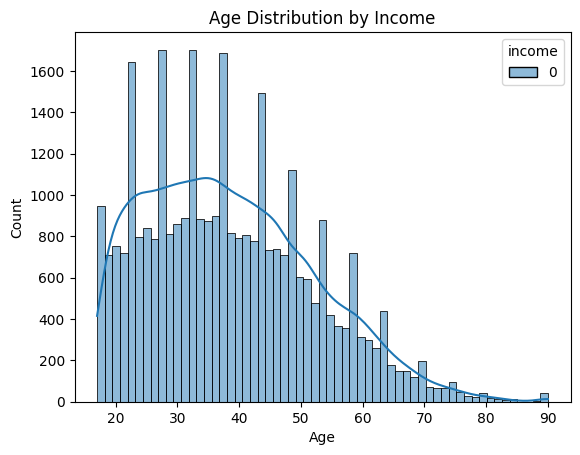

In [157]:
sns.histplot(data=df, x='age', hue='income', kde=True)
plt.title('Age Distribution by Income')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

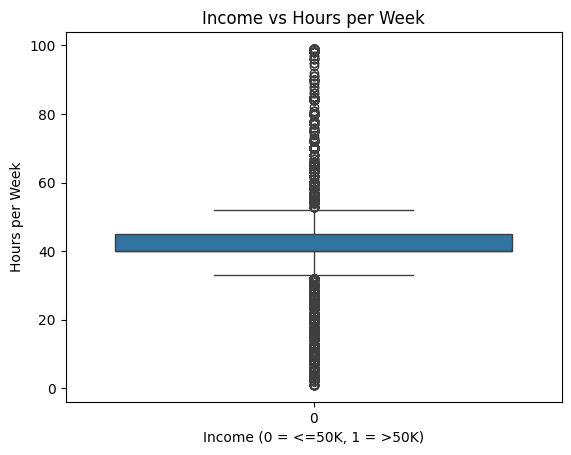

In [158]:
sns.boxplot(data=df, x='income', y='hours.per.week')
plt.title('Income vs Hours per Week')
plt.xlabel('Income (0 = <=50K, 1 = >50K)')
plt.ylabel('Hours per Week')
plt.show()


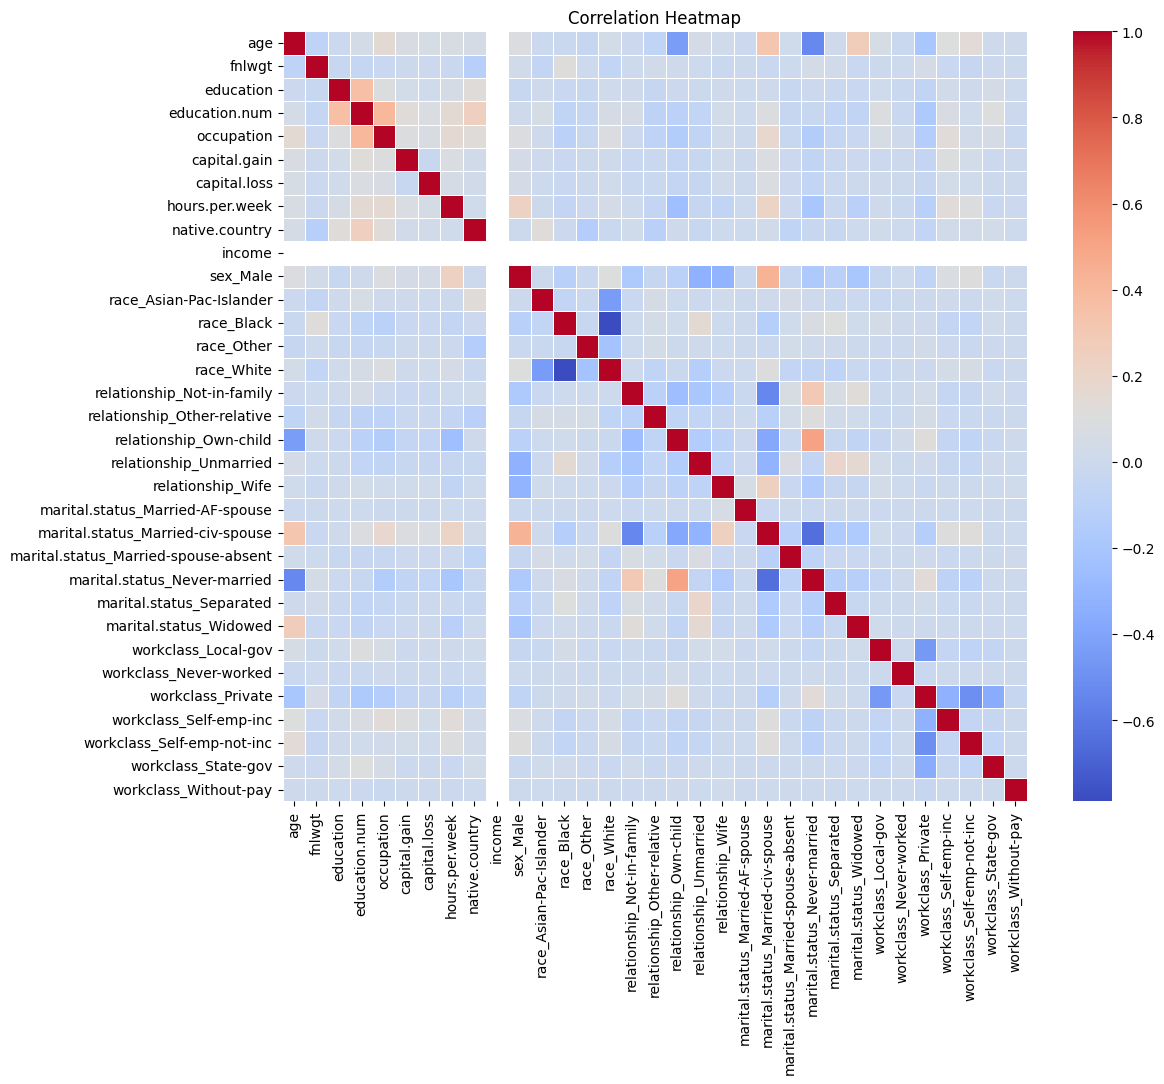

In [163]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Text(0.5, 1.0, 'Income Distribution by Sex')

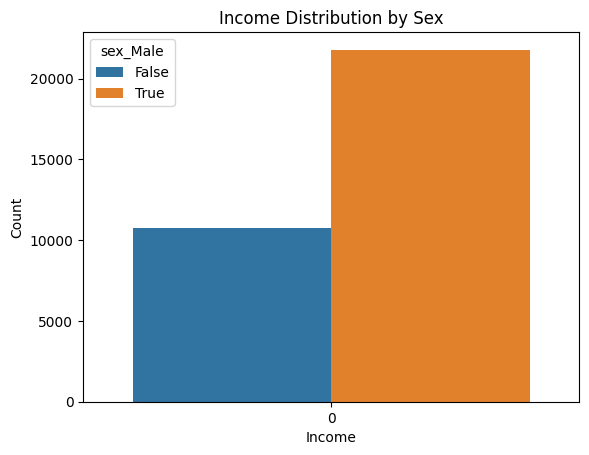

In [168]:
sns.countplot(data=df, x='income', hue='sex_Male')

# Set labels and title
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution by Sex')


In [169]:
df.to_csv('cleaned_adult.csv', index=False)
